In [1]:
#libs
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image

# Table Map

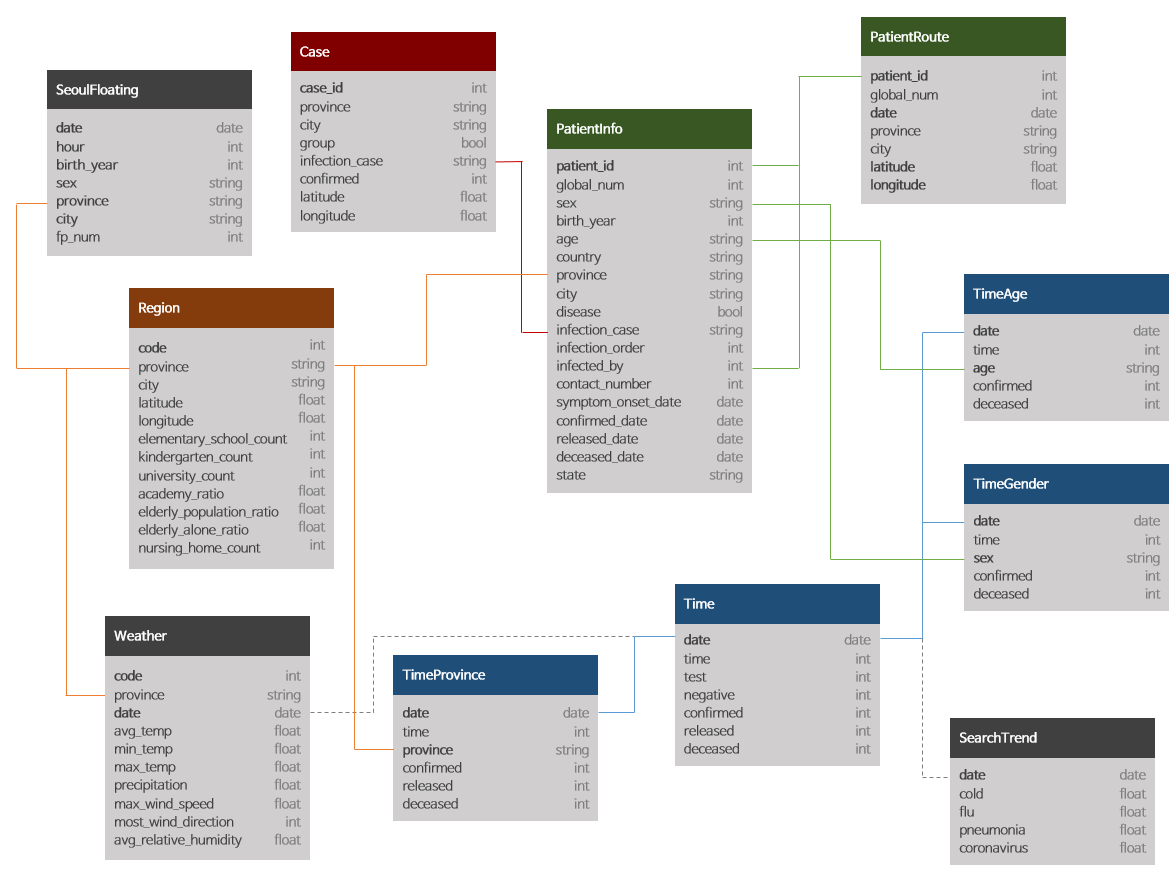

In [2]:
Image(filename="kcdcData/map.png")

# TimeProvince Table

### date
YYYY-MM-DD
### time
Time
### province
the province of South Korea
### confirmed
the accumulated number of the confirmed in the province
### released
the accumulated number of the released in the province
### deceased
the accumulated number of the deceased in the province

# Region Table
### code 
the code of the region
### province
Special City / Metropolitan City / Province(-do)
### city
City(-si) / Country (-gun) / District (-gu)
### latitude
the latitude of the visit (WGS84)
### longitude
the longitude of the visit (WGS84)
### elementary_school_count
the number of elementary schools
### kindergarten_count
the number of kindergartens
### university_count
the number of universities
### academy_ratio
the ratio of academies
### elderly_population_ratio
the ratio of the elderly population
### elderly_alone_ratio
the ratio of elderly households living alone
### nursing_home_count
the number of nursing homes

# Weather Table
### date 
YYYY-MM-DD
### avg_temp
the average temperature
### min_temp
the lowest temperature
### max_temp
the highest temperature
### precipitation
the daily precipitation
### max_wind_speed
the maximum wind speed
### most_wind_direction
the most frequent wind direction
### avg_relative_humidity
the average relative humidity

# SeoulFloating Table (Info on people floating people)

### birth_year
the birth year of the floating population
### sex
the sex of the floating population
### province
Special City / Metropolitan City / Province(-do)
### city
City(-si) / Country (-gun) / District (-gu)
### fp_num
the number of floating population

In [4]:
regions = pd.read_csv('kcdcData/Region.csv')
regions.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [5]:
patients = pd.read_csv('kcdcData/PatientInfo.csv')
patients.head()


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
patients["deceased_date"]=patients["deceased_date"].fillna(0)
patients.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,0,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,0,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,0,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,0,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,0,released


In [9]:

RegionTotals = patients.groupby(['province','city']).agg(num_cases=('patient_id', 'count')).reset_index()
RegionTotals.sort_values(by=['num_cases']).reset_index()

,index,province,city,num_cases
0,121,Jeollanam-do,Gwangyang-si,1
1,113,Incheon,etc,1
2,115,Jeju-do,etc,1
3,116,Jeollabuk-do,Gimje-si,1
4,44,Gangwon-do,Taebaek-si,1
...,...,...,...,...
155,49,Gyeonggi-do,Bucheon-si,67
156,72,Gyeongsangbuk-do,Bonghwa-gun,70
157,23,Chungcheongnam-do,Cheonan-si,102
158,65,Gyeonggi-do,Seongnam-si,109


In [10]:
merged = regions.merge(RegionTotals, on=['province','city'])
merged

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,num_cases
0,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,38
1,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,9
2,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,5
3,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,22
4,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,61130,Gyeongsangnam-do,Changwon-si,35.227992,128.681815,110,195,5,1.84,13.64,6.5,1701,26
150,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94,1
151,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83,1
152,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96,8


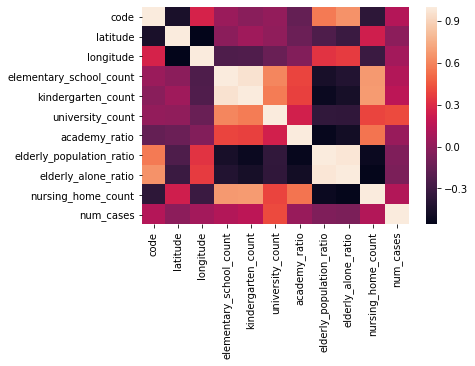

In [11]:
sns.heatmap(merged.corr())